<a href="https://colab.research.google.com/github/ihateundefined/Python/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic 데이터 분석
가설 -> 승선 요금을 많이 낸 사람일수록 생존 확률이 높다
1. 생존자와 비생존자의 비율 구하기
2. 탑승자별 요금
3. 탑승자별 요금 분포에서 생존자와 비생존자를 구분

**1. 생존자 비생존자 비율 구하기**


alive :  342 / 891
dead :  549 / 891


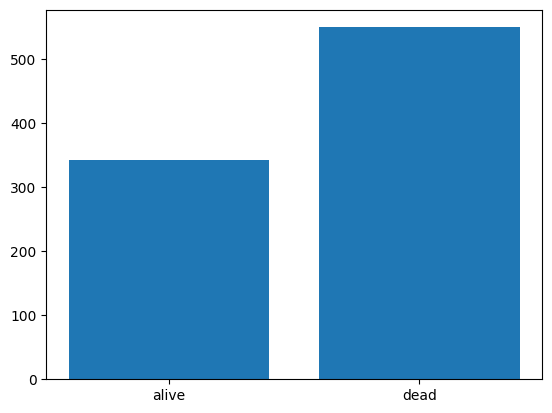

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')

alive = df[df["Survived"] == 1]
dead = df[df["Survived"] == 0]

print('alive : ', len(alive), '/', len(df))
print('dead : ', len(dead), '/', len(df))

plt.bar(['alive', 'dead'], height=[len(alive), len(dead)])
plt.show()

**2. 생존자 별 요금**

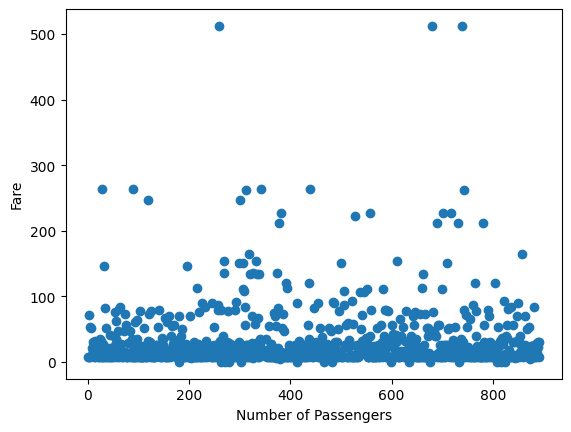

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')

plt.scatter(df['PassengerId'], df['Fare'])
plt.xlabel('Number of Passengers')
plt.ylabel('Fare')
plt.show()

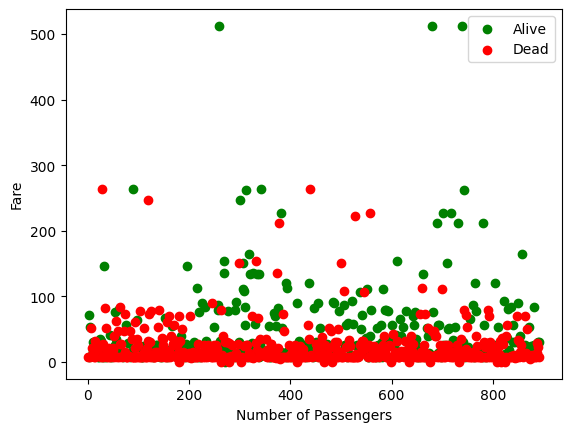

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')

alive = df[df["Survived"] == 1]
dead = df[df["Survived"] == 0]

plt.scatter(alive['PassengerId'], alive['Fare'], color='green', label='Alive')
plt.scatter(dead['PassengerId'], dead['Fare'], color='red', label='Dead')
plt.xlabel('Number of Passengers')
plt.ylabel('Fare')
plt.legend()
plt.show()

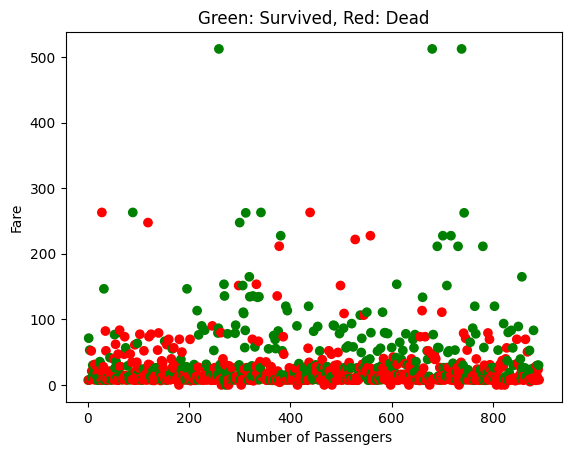

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')

colors = ['green' if survived == 1 else 'red' for survived in df['Survived']]

plt.scatter(df['PassengerId'], df['Fare'], c=colors)
plt.xlabel('Number of Passengers')
plt.ylabel('Fare')
plt.title('Green: Survived, Red: Dead')
plt.show()

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')

over_50 = df[df['Fare'] >= 50]
under_50 = df[df['Fare'] < 50]

alive_over_50 = over_50[over_50['Survived'] == 1]
alive_under_50 = under_50[under_50['Survived'] == 1]

print('over_50 : ', len(over_50), '/', len(df), len(over_50) / len(df) * 100, '%')
print('under_50 : ', len(under_50), '/', len(df), len(under_50) / len(df) * 100, '%')

print('alive_over_50 : ', len(alive_over_50), '/', len(over_50), len(alive_over_50) / len(over_50) * 100, '%')
print('dead_over_50 : ', len(alive_under_50), '/', len(under_50), len(alive_under_50) / len(under_50) * 100, '%')

over_50 :  161 / 891 18.069584736251404 %
under_50 :  730 / 891 81.9304152637486 %
alive_over_50 :  109 / 161 67.70186335403726 %
dead_over_50 :  233 / 730 31.917808219178085 %


시각화


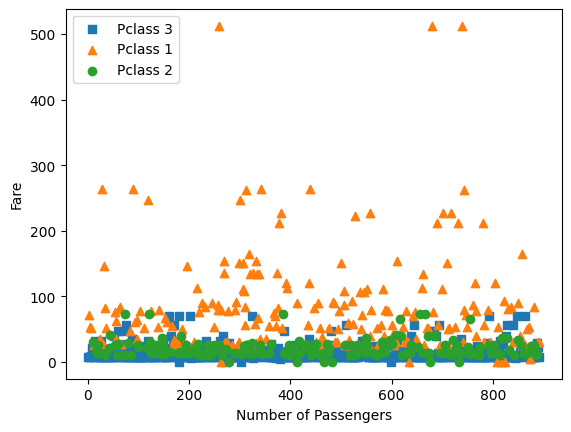

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')

markers = {1: '^', 2: 'o', 3: 's'}

for pclass in df['Pclass'].unique():
    plt.scatter(df[df['Pclass'] == pclass]['PassengerId'],
                df[df['Pclass'] == pclass]['Fare'],
                marker=markers[pclass],
                label=f'Pclass {pclass}')  # Add label for legend

plt.xlabel('Number of Passengers')
plt.ylabel('Fare')
plt.legend()  # Display legend to identify markers
plt.show()

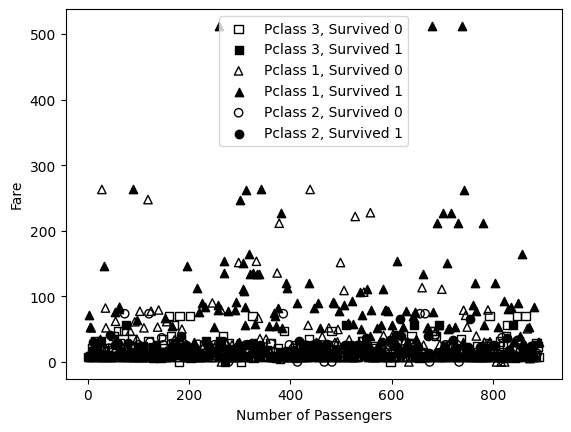

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')

markers = {
    (1, 1): '^', (1, 0): '^',
    (2, 1): 'o', (2, 0): 'o',
    (3, 1): 's', (3, 0): 's'
}

facecolors = {1: 'black', 0: 'none'}

for pclass in df['Pclass'].unique():
    for survived in df['Survived'].unique():
        subset = df[(df['Pclass'] == pclass) & (df['Survived'] == survived)]
        plt.scatter(subset['PassengerId'],
                    subset['Fare'],
                    marker=markers[(pclass, survived)],
                    facecolors=facecolors[survived],
                    edgecolors='black',
                    label=f'Pclass {pclass}, Survived {survived}')

plt.xlabel('Number of Passengers')
plt.ylabel('Fare')
plt.legend()
plt.show()